# <center>Градиентный бустинг для задачи регрессии</center>

In [1]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
%matplotlib inline

**Задание.** Используйте каркас модели, представленный ниже, для реализации алгоритма градиентного бустинга.

Краткая спецификация:

- Метод `mse_grad` должен возвращать градиент функции потерь для задачи регрессии.
- В переменной `trees_` будем хранить обученные деревья регрессии.
- В переменной `residuals_` будем хранить остатки композиции на каждом шаге обучения.
- В методе `fit` необходимо инициализировать начальное приближение как среднее значение `y` для всех объектов выборки. Сохраните среднее значение в переменную `self.y`, оно пригодится на этапе предсказаний.
- На каждом шаге обучения необходимо вычислить остатки композиции, затем на остатках обучить дерево регрессии с `max_depth` и `random_state` класса и добавить предсказания текущего дерева к имеющимся с шагом `learning_rate`.
- Метод `predict` должен возвращать предсказания композиции алгоритмов.

In [16]:
class GradientBoostingCustom(BaseEstimator):
    
    @staticmethod
    def mse_grad(y_true, y_pred):
        return - (y_true - y_pred)
    
    def __init__(self, n_estimators=10, learning_rate=0.01, max_depth=3, random_state=17):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
            
        self.trees_ = []
        self.residuals_ = []
            
    def fit(self, X, y):
        self.y = np.mean(y)
        y_pred = np.full(len(y), self.y)
        
        for t in range(self.n_estimators):
            residual = -self.mse_grad(y, y_pred)
            dt = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            dt.fit(X, residual)
            dt_predict = dt.predict(X)
            y_pred =y_pred + self.learning_rate * dt_predict
            self.residuals_.append(residual)
            self.trees_.append(dt)
        
    def predict(self, X):
        matrix = np.array([self.learning_rate * tree.predict(X) for tree in self.trees_])
        return np.sum(matrix, axis=0) + self.y

Если всё сделано верно, следующая визуализация позволит увидеть результат обучения.

In [17]:
X_train = np.arange(7).reshape(-1, 1)
y_train = (np.arange(7) - 3) ** 2

Обучающая выборка и искомая зависимость:

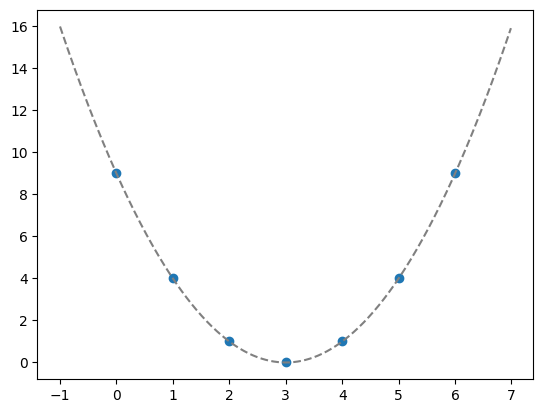

In [18]:
X_test = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01)

plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
plt.scatter(X_train, y_train)
plt.show()

Результат предсказаний алгоритма:

In [19]:
gbm = GradientBoostingCustom(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=17)
gbm.fit(X_train, y_train)

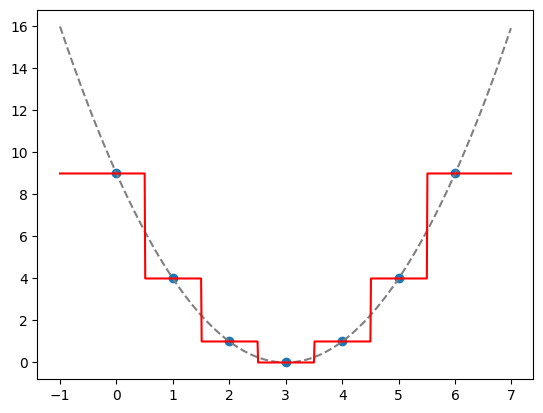

In [22]:
plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
plt.scatter(X_train, y_train)
plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), color='red')
plt.show()

Величины остатков на каждом шаге обучения:

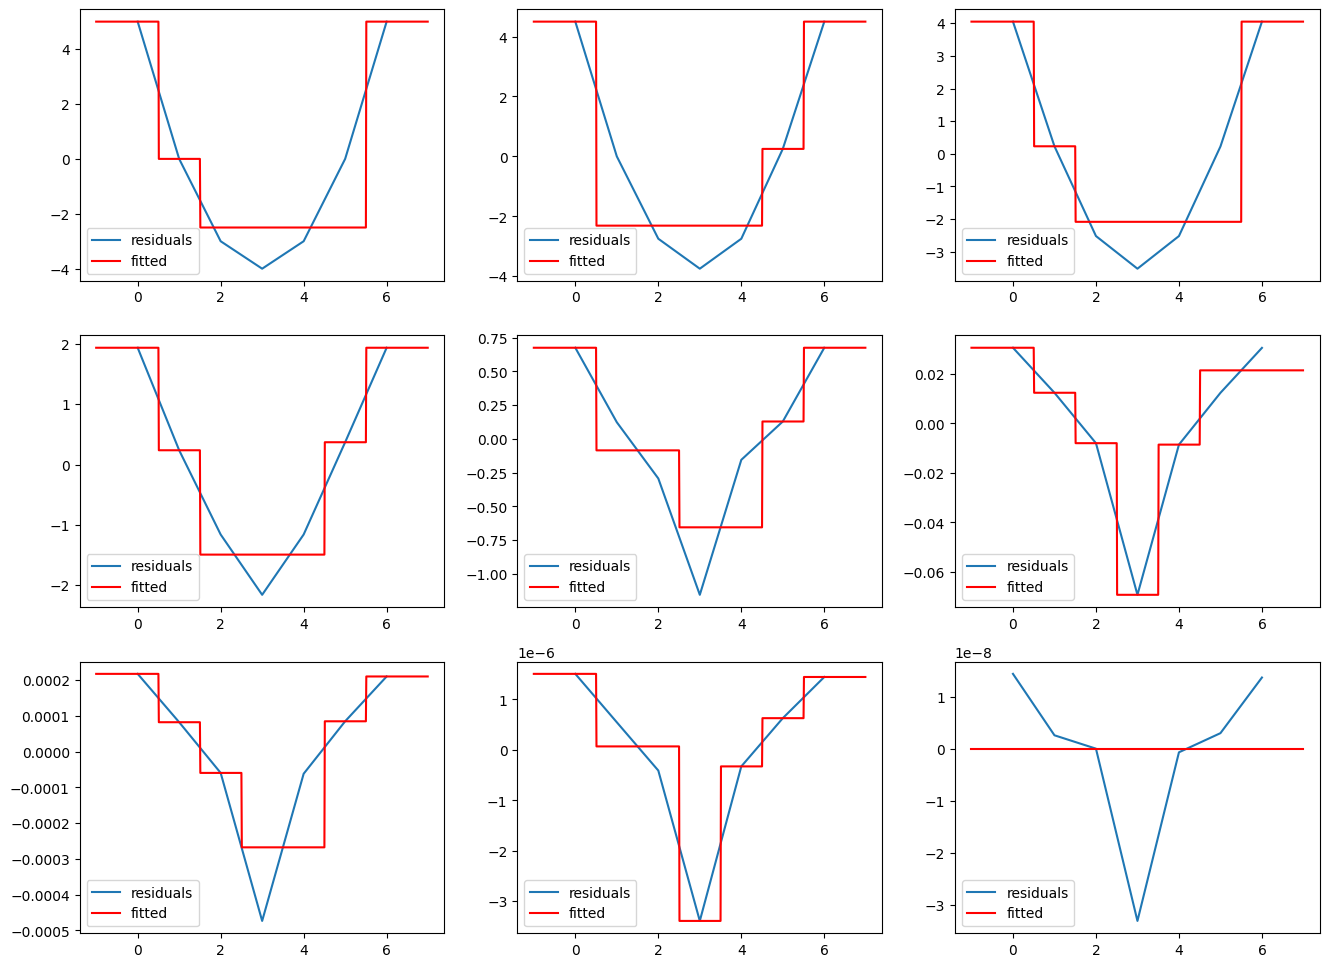

In [23]:
plt.subplots(3, 3, figsize=(16, 12))

for ax, tree_idx in enumerate([1, 2, 3, 10, 20, 50, 100, 150, 200], 1):
    plt.subplot(3, 3, ax)
    plt.plot(X_train, gbm.residuals_[tree_idx - 1], label='residuals')
    plt.plot(X_test, gbm.trees_[tree_idx - 1].predict(X_test.reshape(-1, 1)), 
             color='red', label='fitted');
    plt.legend();

Предсказания композиции алгоритмов в зависимости от итерации:

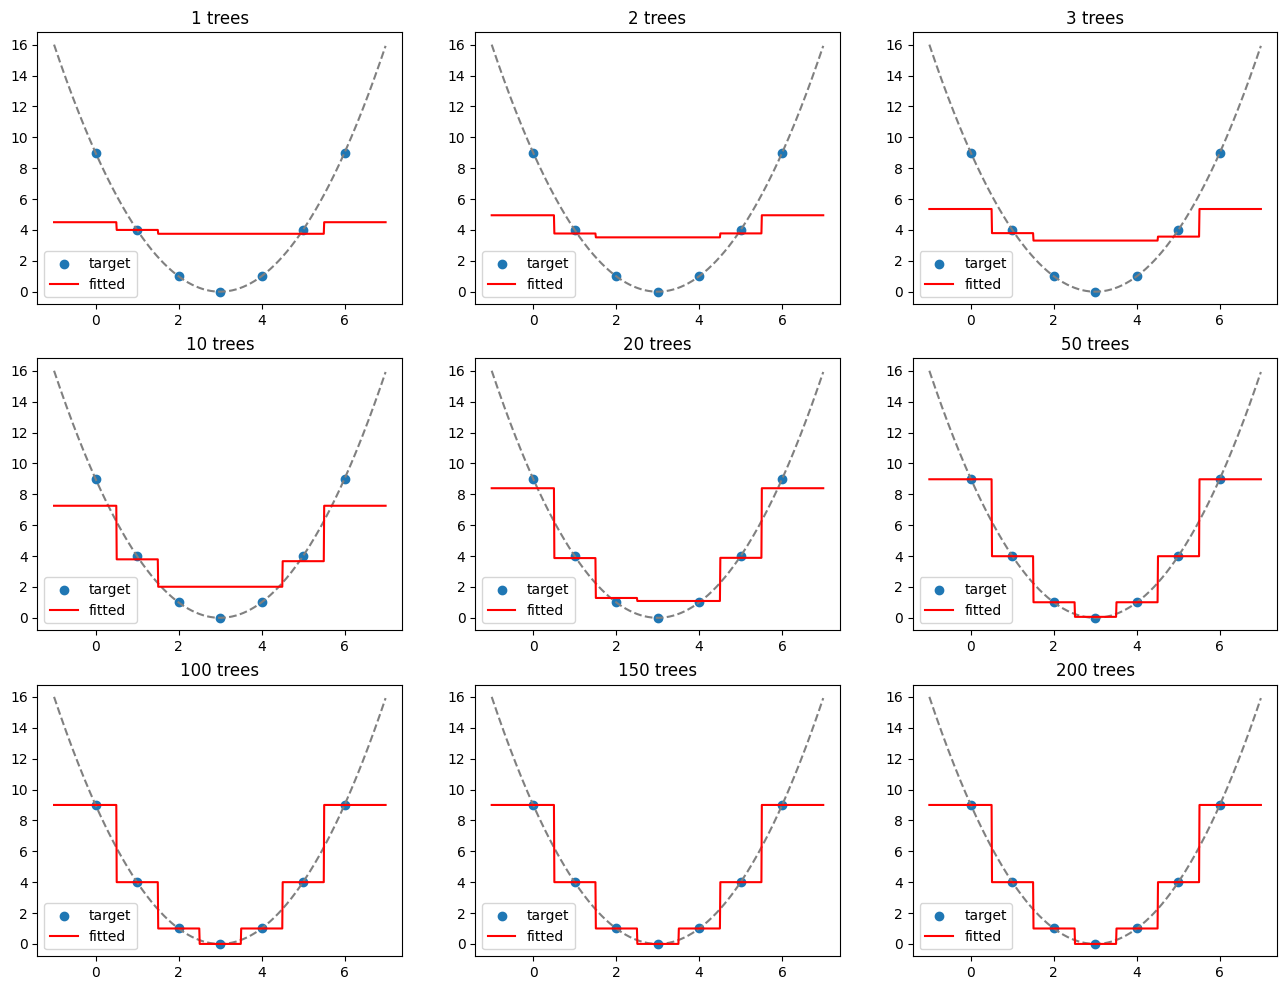

In [24]:
plt.subplots(3, 3, figsize=(16, 12))

for ax, num_trees in enumerate([1, 2, 3, 10, 20, 50, 100, 150, 200], 1):
    plt.subplot(3, 3, ax)
    gbm = GradientBoostingCustom(n_estimators=num_trees, max_depth=3, 
                                 learning_rate=0.1, random_state=17)
    gbm.fit(X_train, y_train)
    
    plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
    plt.scatter(X_train, y_train, label='target')
    plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), color='red', label='fitted');
    plt.legend();
    plt.title('%s trees' % str(num_trees))